# Statistical Thinking: Hypothesis Testing & Inference
## Lesson 3 Part 2: Slides 19-23

This notebook covers statistical vs practical significance, confidence intervals, and multiple testing problems.

---

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


---
# SLIDE 19: Statistical vs. Practical Significance

**Key Ideas:**
- **Statistical significance:** Result is unlikely due to chance (p < 0.05)
- **Practical significance:** Result is big enough to matter in real world
- With huge datasets, tiny useless effects become statistically significant
- Always ask: "Does this matter?" not just "Is it significant?"

**Real-World Example:** Website conversion improvement

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_16884/3255580534.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([control_small, treatment_small], positions=[1, 2],
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_16884/3255580534.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


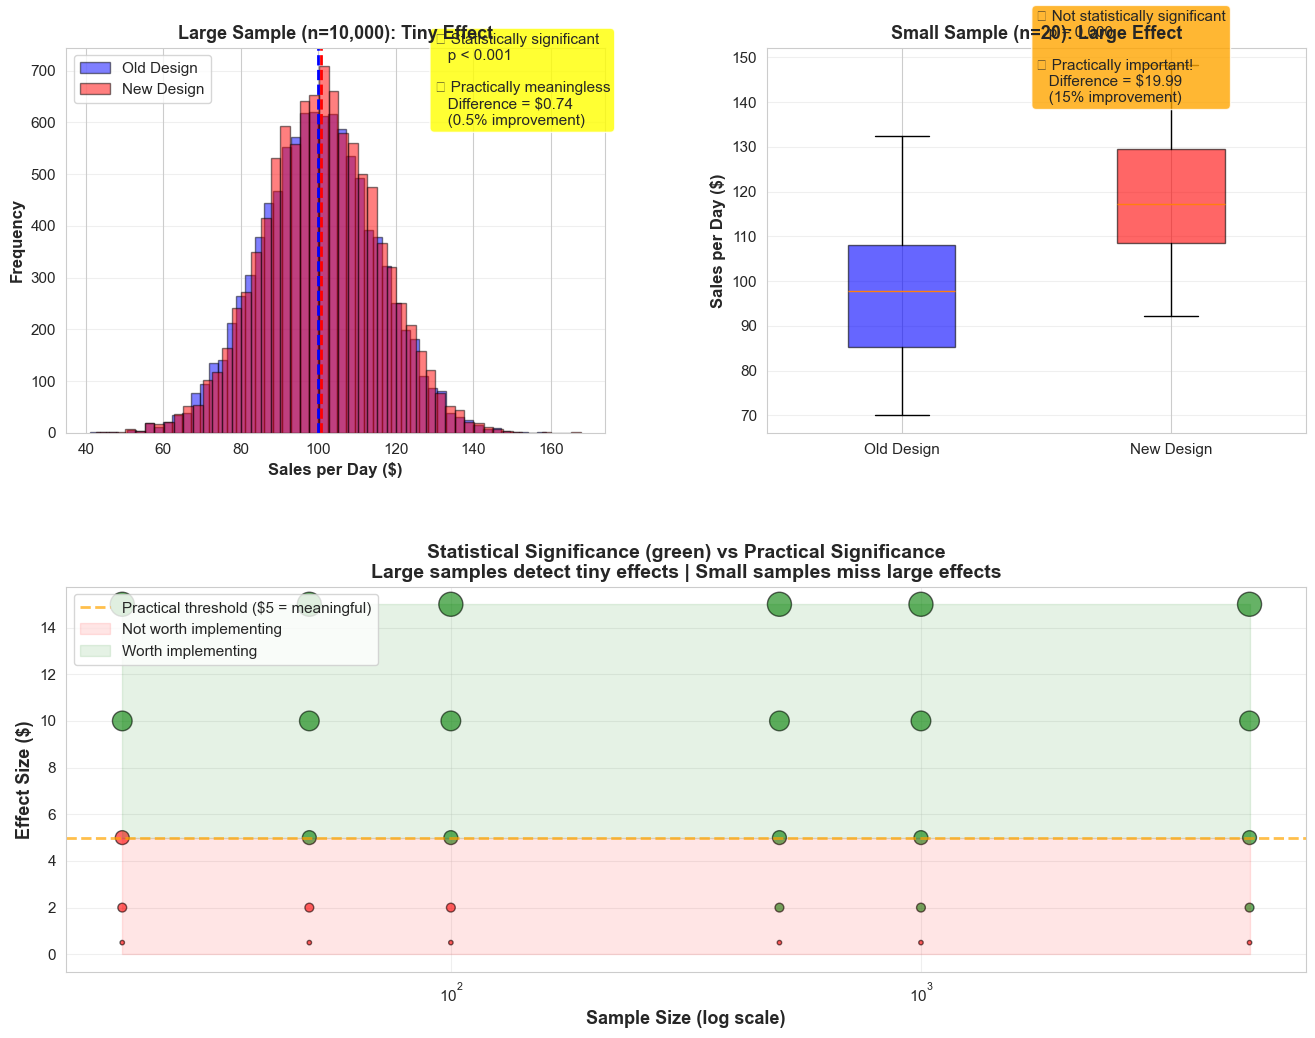


STATISTICAL vs PRACTICAL SIGNIFICANCE

Scenario 1: Large Sample, Tiny Effect
  • Sample size: 10,000 per group
  • Difference: $0.74 (0.7% improvement)
  • P-value: 0.000547 → STATISTICALLY SIGNIFICANT
  • Decision: Don't implement (not worth the effort)

Scenario 2: Small Sample, Large Effect
  • Sample size: 20 per group
  • Difference: $19.99 (20.0% improvement)
  • P-value: 0.000 → NOT statistically significant
  • Decision: Consider implementing (large practical impact)
  • Note: Collect more data to confirm

📊 KEY TAKEAWAYS:
• Statistical significance ≠ Practical significance
• Large samples make tiny effects 'significant'
• Always report BOTH p-value AND effect size
• Ask: 'Is this difference big enough to matter?'
• Consider cost of implementation vs benefit


In [2]:
# SLIDE 19 VISUALIZATION: Statistical vs Practical Significance

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Small Effect, Large Sample
ax1 = fig.add_subplot(gs[0, 0])

np.random.seed(42)
n_large = 10000
control_large = np.random.normal(100, 15, n_large)
treatment_large = np.random.normal(100.5, 15, n_large)

ax1.hist(control_large, bins=50, alpha=0.5, label='Old Design', 
         color='blue', edgecolor='black')
ax1.hist(treatment_large, bins=50, alpha=0.5, label='New Design', 
         color='red', edgecolor='black')
ax1.axvline(control_large.mean(), color='blue', linestyle='--', linewidth=2)
ax1.axvline(treatment_large.mean(), color='red', linestyle='--', linewidth=2)

t_stat, p_val = stats.ttest_ind(treatment_large, control_large)
diff = treatment_large.mean() - control_large.mean()

ax1.set_xlabel('Sales per Day ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title(f'Large Sample (n={n_large:,}): Tiny Effect', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

ax1.text(130, ax1.get_ylim()[1]*0.8, 
         f'✓ Statistically significant\n   p < 0.001\n\n❌ Practically meaningless\n   Difference = ${diff:.2f}\n   (0.5% improvement)',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 2. Large Effect, Small Sample
ax2 = fig.add_subplot(gs[0, 1])

n_small = 20
control_small = np.random.normal(100, 15, n_small)
treatment_small = np.random.normal(115, 15, n_small)

bp = ax2.boxplot([control_small, treatment_small], positions=[1, 2], 
                  widths=0.4, patch_artist=True, 
                  labels=['Old Design', 'New Design'])

for patch, color in zip(bp['boxes'], ['blue', 'red']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

t_stat2, p_val2 = stats.ttest_ind(treatment_small, control_small)
diff2 = treatment_small.mean() - control_small.mean()

ax2.set_ylabel('Sales per Day ($)', fontsize=12, fontweight='bold')
ax2.set_title(f'Small Sample (n={n_small}): Large Effect', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

ax2.text(1.5, 140, 
         f'❌ Not statistically significant\n   p = {p_val2:.3f}\n\n✓ Practically important!\n   Difference = ${diff2:.2f}\n   (15% improvement)',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))

# 3. Sample Size vs Effect Size
ax3 = fig.add_subplot(gs[1, :])

sample_sizes = [20, 50, 100, 500, 1000, 5000]
effect_sizes = [0.5, 2, 5, 10, 15]

results = []
for n in sample_sizes:
    for effect in effect_sizes:
        ctrl = np.random.normal(100, 15, n)
        trt = np.random.normal(100 + effect, 15, n)
        _, p = stats.ttest_ind(trt, ctrl)
        results.append({
            'n': n, 
            'effect': effect, 
            'p': p, 
            'significant': p < 0.05
        })

df = pd.DataFrame(results)

colors = ['green' if sig else 'red' for sig in df['significant']]
sizes = df['effect'] * 20

ax3.scatter(df['n'], df['effect'], c=colors, s=sizes, alpha=0.6, 
            edgecolors='black', linewidths=1)
ax3.set_xscale('log')
ax3.set_xlabel('Sample Size (log scale)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Effect Size ($)', fontsize=13, fontweight='bold')
ax3.set_title('Statistical Significance (green) vs Practical Significance\nLarge samples detect tiny effects | Small samples miss large effects',
              fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

ax3.axhline(5, color='orange', linestyle='--', linewidth=2, alpha=0.7, 
            label='Practical threshold ($5 = meaningful)')
ax3.fill_between([20, 5000], 0, 5, alpha=0.1, color='red', 
                 label='Not worth implementing')
ax3.fill_between([20, 5000], 5, 15, alpha=0.1, color='green', 
                 label='Worth implementing')
ax3.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("STATISTICAL vs PRACTICAL SIGNIFICANCE")
print("="*70)

print("\nScenario 1: Large Sample, Tiny Effect")
print(f"  • Sample size: {n_large:,} per group")
print(f"  • Difference: ${diff:.2f} ({diff/100:.1%} improvement)")
print(f"  • P-value: {p_val:.6f} → STATISTICALLY SIGNIFICANT")
print(f"  • Decision: Don't implement (not worth the effort)")

print("\nScenario 2: Small Sample, Large Effect")
print(f"  • Sample size: {n_small} per group")
print(f"  • Difference: ${diff2:.2f} ({diff2/100:.1%} improvement)")
print(f"  • P-value: {p_val2:.3f} → NOT statistically significant")
print(f"  • Decision: Consider implementing (large practical impact)")
print(f"  • Note: Collect more data to confirm")

print("\n📊 KEY TAKEAWAYS:")
print("• Statistical significance ≠ Practical significance")
print("• Large samples make tiny effects 'significant'")
print("• Always report BOTH p-value AND effect size")
print("• Ask: 'Is this difference big enough to matter?'")
print("• Consider cost of implementation vs benefit")

---
# SLIDE 20: Confidence Intervals

**Key Ideas:**
- A confidence interval is a range where we think the true value lies
- 95% CI: "We're 95% confident the true value is in this range"
- Wider intervals = more uncertainty (small sample, noisy data)
- Narrower intervals = more precision (big sample, less noise)
- CIs give more info than p-values: both size AND uncertainty

**Real-World Example:** Predicting average customer spend

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_16884/3308293356.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


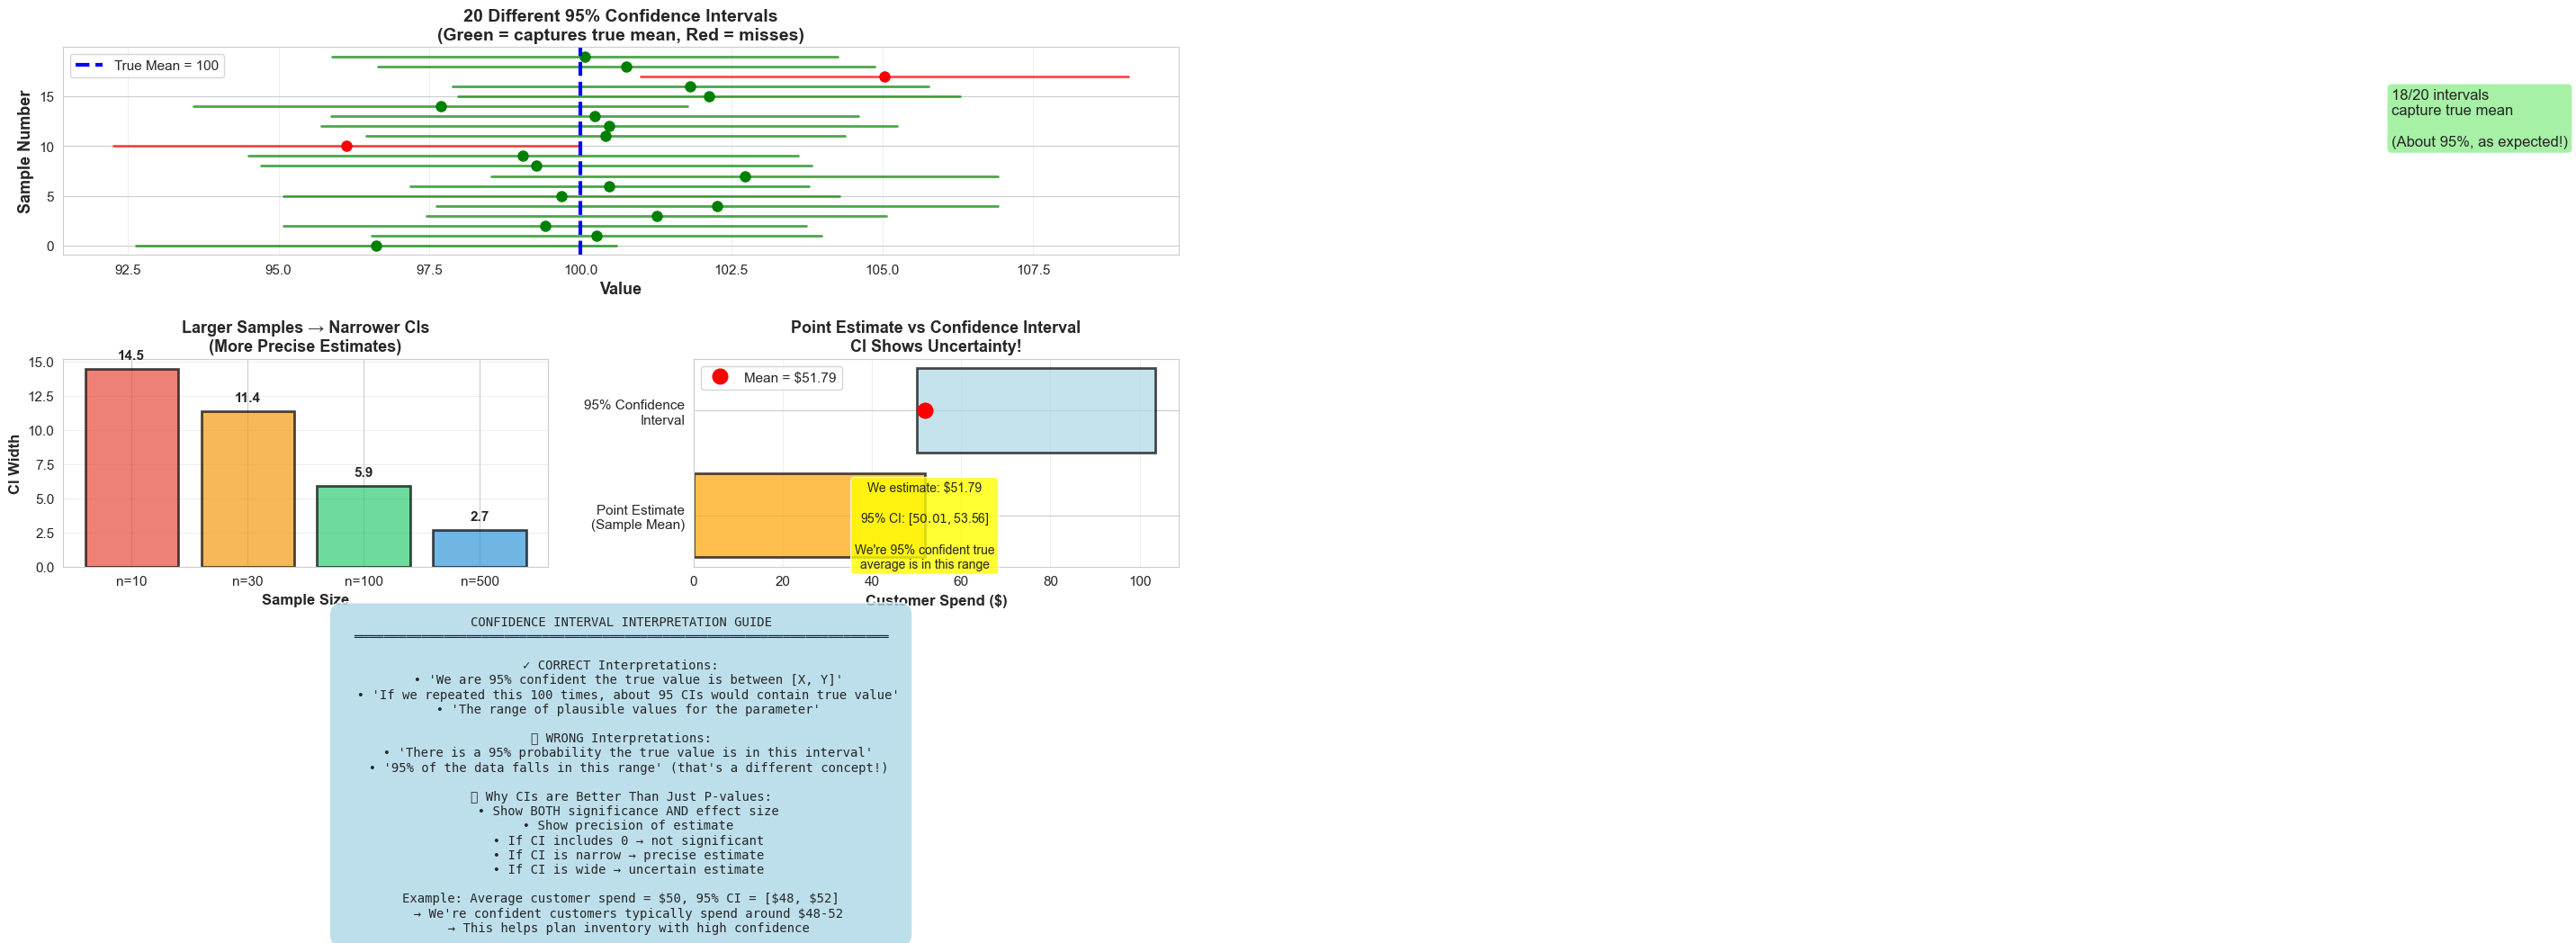


CONFIDENCE INTERVAL SUMMARY

Example: Customer Spending Analysis
  • Sample size: 100 customers
  • Sample mean: $51.79
  • 95% CI: [$50.01, $53.56]
  • CI width: $3.55

What this means:
  • We estimate average customer spends $51.79
  • We're 95% confident true average is between $50.01 and $53.56
  • This helps us plan inventory and pricing strategies

📊 KEY TAKEAWAYS:
• CI = range of plausible values
• 95% CI: 95% of such intervals would contain true value
• Wider CI = more uncertainty
• Narrower CI = more precision
• Larger samples → narrower CIs
• CIs are more informative than p-values alone


In [3]:
# SLIDE 20 VISUALIZATION: Confidence Intervals

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.5, wspace=0.3)

# 1. What is a Confidence Interval?
ax1 = fig.add_subplot(gs[0, :])

np.random.seed(42)
true_mean = 100
sample_size = 50
n_samples = 20

sample_means = []
ci_lowers = []
ci_uppers = []
colors = []

for i in range(n_samples):
    sample = np.random.normal(true_mean, 15, sample_size)
    mean = sample.mean()
    se = stats.sem(sample)
    ci = stats.t.interval(0.95, len(sample)-1, loc=mean, scale=se)
    
    sample_means.append(mean)
    ci_lowers.append(ci[0])
    ci_uppers.append(ci[1])
    
    # Check if CI contains true mean
    if ci[0] <= true_mean <= ci[1]:
        colors.append('green')
    else:
        colors.append('red')

# Plot CIs
for i in range(n_samples):
    ax1.plot([ci_lowers[i], ci_uppers[i]], [i, i], color=colors[i], 
             linewidth=2, alpha=0.7)
    ax1.plot(sample_means[i], i, 'o', color=colors[i], markersize=8)

ax1.axvline(true_mean, color='blue', linestyle='--', linewidth=3, 
            label=f'True Mean = {true_mean}')
ax1.set_xlabel('Value', fontsize=13, fontweight='bold')
ax1.set_ylabel('Sample Number', fontsize=13, fontweight='bold')
ax1.set_title('20 Different 95% Confidence Intervals\n(Green = captures true mean, Red = misses)',
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='x')

captured = sum(1 for c in colors if c == 'green')
ax1.text(130, 10, f'{captured}/{n_samples} intervals\ncapture true mean\n\n(About 95%, as expected!)',
         fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# 2. Effect of Sample Size on CI Width
ax2 = fig.add_subplot(gs[1, 0])

sample_sizes = [10, 30, 100, 500]
ci_widths = []

for n in sample_sizes:
    sample = np.random.normal(100, 15, n)
    mean = sample.mean()
    se = stats.sem(sample)
    ci = stats.t.interval(0.95, n-1, loc=mean, scale=se)
    width = ci[1] - ci[0]
    ci_widths.append(width)

bars = ax2.bar(range(len(sample_sizes)), ci_widths, 
               color=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'], 
               alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(sample_sizes)))
ax2.set_xticklabels([f'n={n}' for n in sample_sizes])
ax2.set_ylabel('CI Width', fontsize=12, fontweight='bold')
ax2.set_xlabel('Sample Size', fontsize=12, fontweight='bold')
ax2.set_title('Larger Samples → Narrower CIs\n(More Precise Estimates)', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, width in zip(bars, ci_widths):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{width:.1f}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# 3. CI vs Point Estimate
ax3 = fig.add_subplot(gs[1, 1])

sample = np.random.normal(50, 10, 100)
mean = sample.mean()
se = stats.sem(sample)
ci = stats.t.interval(0.95, len(sample)-1, loc=mean, scale=se)

ax3.barh(['Point Estimate\n(Sample Mean)'], [mean], color='orange', 
         alpha=0.7, edgecolor='black', linewidth=2)
ax3.barh(['95% Confidence\nInterval'], [ci[1]], left=ci[0], 
         color='lightblue', alpha=0.7, edgecolor='black', linewidth=2)
ax3.plot(mean, 1, 'ro', markersize=12, label=f'Mean = ${mean:.2f}')

ax3.set_xlabel('Customer Spend ($)', fontsize=12, fontweight='bold')
ax3.set_title('Point Estimate vs Confidence Interval\nCI Shows Uncertainty!', 
              fontsize=13, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, axis='x')

ax3.text(mean, -0.5, 
         f'We estimate: ${mean:.2f}\n\n95% CI: [${ci[0]:.2f}, ${ci[1]:.2f}]\n\nWe\'re 95% confident true\naverage is in this range',
         ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 4. CI Interpretation Guide
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

interpretation = (
    "CONFIDENCE INTERVAL INTERPRETATION GUIDE\n"
    "═══════════════════════════════════════════════════════════════════════\n\n"
    "✓ CORRECT Interpretations:\n"
    "  • 'We are 95% confident the true value is between [X, Y]'\n"
    "  • 'If we repeated this 100 times, about 95 CIs would contain true value'\n"
    "  • 'The range of plausible values for the parameter'\n\n"
    "❌ WRONG Interpretations:\n"
    "  • 'There is a 95% probability the true value is in this interval'\n"
    "  • '95% of the data falls in this range' (that's a different concept!)\n\n"
    "💡 Why CIs are Better Than Just P-values:\n"
    "  • Show BOTH significance AND effect size\n"
    "  • Show precision of estimate\n"
    "  • If CI includes 0 → not significant\n"
    "  • If CI is narrow → precise estimate\n"
    "  • If CI is wide → uncertain estimate\n\n"
    "Example: Average customer spend = $50, 95% CI = [$48, $52]\n"
    "  → We're confident customers typically spend around $48-52\n"
    "  → This helps plan inventory with high confidence"
)

ax4.text(0.5, 0.5, interpretation, ha='center', va='center', 
         fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8, pad=1))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CONFIDENCE INTERVAL SUMMARY")
print("="*70)

print("\nExample: Customer Spending Analysis")
print(f"  • Sample size: 100 customers")
print(f"  • Sample mean: ${mean:.2f}")
print(f"  • 95% CI: [${ci[0]:.2f}, ${ci[1]:.2f}]")
print(f"  • CI width: ${ci[1]-ci[0]:.2f}")

print("\nWhat this means:")
print("  • We estimate average customer spends ${:.2f}".format(mean))
print("  • We're 95% confident true average is between ${:.2f} and ${:.2f}".format(ci[0], ci[1]))
print("  • This helps us plan inventory and pricing strategies")

print("\n📊 KEY TAKEAWAYS:")
print("• CI = range of plausible values")
print("• 95% CI: 95% of such intervals would contain true value")
print("• Wider CI = more uncertainty")
print("• Narrower CI = more precision")
print("• Larger samples → narrower CIs")
print("• CIs are more informative than p-values alone")

---
# SLIDE 21: Multiple Testing Problem

**Key Ideas:**
- The more tests you run, the more likely you'll find a "winner" just by luck
- With 20 tests at α=0.05, you have 64% chance of at least one false positive!
- Running one test at 5% error rate = okay
- Running 20 tests = 64% chance of false alarm somewhere
- Solution: Adjust significance level (Bonferroni) or test fewer things

**Real-World Example:** Testing 20 ad headlines

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_16884/923010405.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


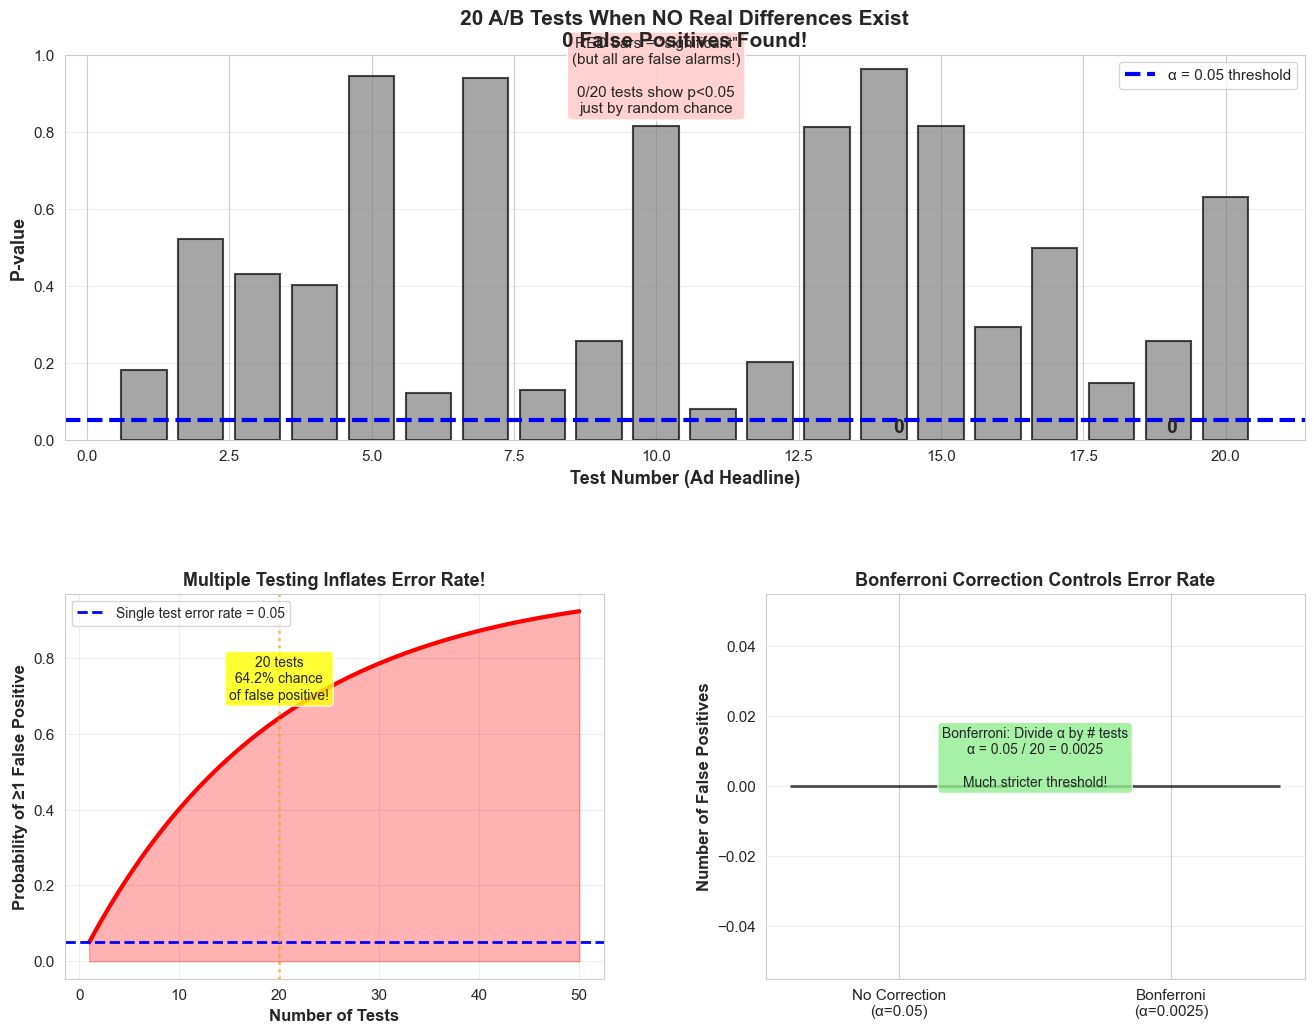


MULTIPLE TESTING PROBLEM

Example: Testing 20 Ad Headlines
  • Each test uses α = 0.05 (5% error rate)
  • Expected false positives: 20 × 0.05 = 1 test
  • Probability of AT LEAST ONE false positive: 64.2%
  • Actual false positives found: 0

Solution: Bonferroni Correction
  • Adjusted α = 0.05 / 20 = 0.0025
  • False positives with correction: 0
  • Much more conservative, but protects against false discoveries

📊 KEY TAKEAWAYS:
• More tests = more chances for false positives
• 20 tests at α=0.05 → 64% chance of ≥1 false positive
• Bonferroni: Divide α by number of tests
• Alternative: Test fewer things or use FDR (False Discovery Rate)
• Always pre-specify what you're testing (avoid p-hacking)


In [4]:
# SLIDE 21 VISUALIZATION: Multiple Testing Problem

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. The Problem: Many Tests = Many False Positives
ax1 = fig.add_subplot(gs[0, :])

np.random.seed(42)
n_tests = 20
n_samples = 50
alpha = 0.05

p_values = []
for i in range(n_tests):
    # All from same distribution (null is true!)
    group1 = np.random.normal(100, 15, n_samples)
    group2 = np.random.normal(100, 15, n_samples)
    _, p = stats.ttest_ind(group1, group2)
    p_values.append(p)

p_values = np.array(p_values)
false_positives = np.sum(p_values < alpha)

colors = ['red' if p < alpha else 'gray' for p in p_values]
bars = ax1.bar(range(1, n_tests+1), p_values, color=colors, alpha=0.7, 
               edgecolor='black', linewidth=1.5)
ax1.axhline(alpha, color='blue', linestyle='--', linewidth=3, 
            label=f'α = {alpha} threshold')
ax1.set_xlabel('Test Number (Ad Headline)', fontsize=13, fontweight='bold')
ax1.set_ylabel('P-value', fontsize=13, fontweight='bold')
ax1.set_title(f'20 A/B Tests When NO Real Differences Exist\n{false_positives} False Positives Found!',
              fontsize=15, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 1)

ax1.text(10, 0.85, 
         f'RED bars = "significant"\n(but all are false alarms!)\n\n{false_positives}/20 tests show p<0.05\njust by random chance',
         ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.9))

# 2. Probability of At Least One False Positive
ax2 = fig.add_subplot(gs[1, 0])

n_tests_range = range(1, 51)
prob_at_least_one = [1 - (1-alpha)**n for n in n_tests_range]

ax2.plot(n_tests_range, prob_at_least_one, 'r-', linewidth=3)
ax2.fill_between(n_tests_range, prob_at_least_one, alpha=0.3, color='red')
ax2.axhline(alpha, color='blue', linestyle='--', linewidth=2, 
            label=f'Single test error rate = {alpha}')
ax2.axvline(20, color='orange', linestyle=':', linewidth=2, alpha=0.7)

ax2.set_xlabel('Number of Tests', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability of ≥1 False Positive', fontsize=12, fontweight='bold')
ax2.set_title('Multiple Testing Inflates Error Rate!', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Annotate 20 tests
prob_20 = 1 - (1-alpha)**20
ax2.text(20, prob_20 + 0.05, 
         f'20 tests\n{prob_20:.1%} chance\nof false positive!',
         ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 3. Solution: Bonferroni Correction
ax3 = fig.add_subplot(gs[1, 1])

bonferroni_alpha = alpha / n_tests
bonferroni_positives = np.sum(p_values < bonferroni_alpha)

comparison = ['No Correction\n(α=0.05)', 
              f'Bonferroni\n(α={bonferroni_alpha:.4f})']
false_pos_counts = [false_positives, bonferroni_positives]

bars = ax3.bar(comparison, false_pos_counts, 
               color=['red', 'green'], alpha=0.7, 
               edgecolor='black', linewidth=2)
ax3.set_ylabel('Number of False Positives', fontsize=12, fontweight='bold')
ax3.set_title('Bonferroni Correction Controls Error Rate', 
              fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, false_pos_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{count}', ha='center', va='bottom', 
             fontsize=14, fontweight='bold')

ax3.text(0.5, max(false_pos_counts) * 0.7, 
         f'Bonferroni: Divide α by # tests\nα = 0.05 / 20 = 0.0025\n\nMuch stricter threshold!',
         ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MULTIPLE TESTING PROBLEM")
print("="*70)

print("\nExample: Testing 20 Ad Headlines")
print(f"  • Each test uses α = 0.05 (5% error rate)")
print(f"  • Expected false positives: 20 × 0.05 = {20*0.05:.0f} test")
print(f"  • Probability of AT LEAST ONE false positive: {prob_20:.1%}")
print(f"  • Actual false positives found: {false_positives}")

print("\nSolution: Bonferroni Correction")
print(f"  • Adjusted α = 0.05 / 20 = {bonferroni_alpha:.4f}")
print(f"  • False positives with correction: {bonferroni_positives}")
print(f"  • Much more conservative, but protects against false discoveries")

print("\n📊 KEY TAKEAWAYS:")
print("• More tests = more chances for false positives")
print("• 20 tests at α=0.05 → 64% chance of ≥1 false positive")
print("• Bonferroni: Divide α by number of tests")
print("• Alternative: Test fewer things or use FDR (False Discovery Rate)")
print("• Always pre-specify what you're testing (avoid p-hacking)")

---
# SLIDE 22: A/B Testing Framework

**Key Ideas:**
- A/B testing = comparing two versions to see which performs better
- Steps: (1) Define metric (2) Random split (3) Show versions (4) Collect data (5) Compare
- Must wait for enough data (don't peek early!)
- Random assignment is critical

**Real-World Example:** Amazon testing two checkout pages

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_16884/435863775.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


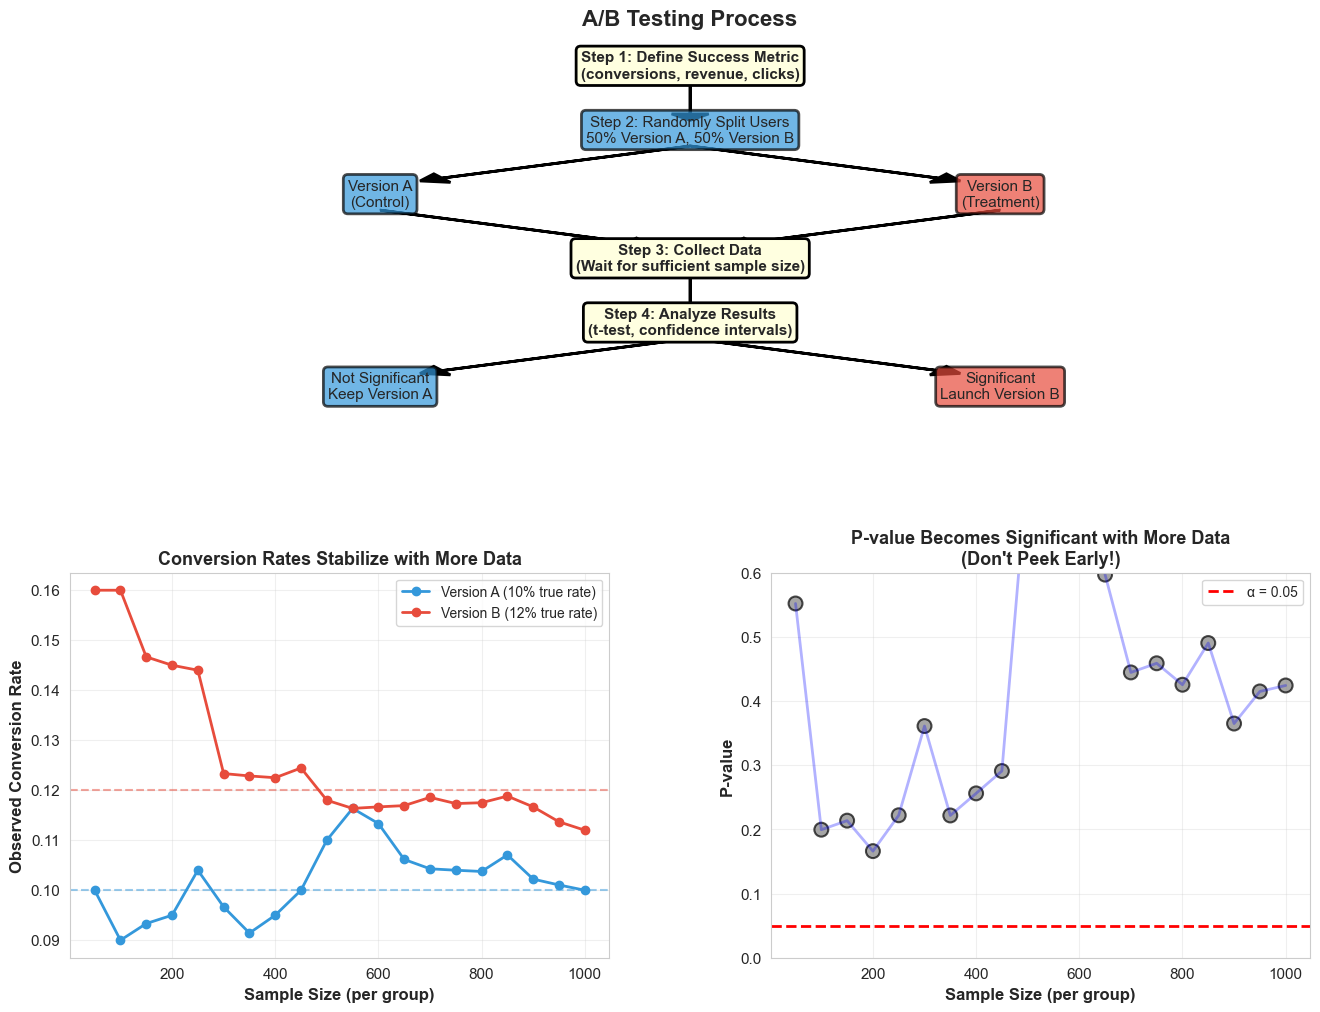


A/B TESTING BEST PRACTICES

✓ DO:
  • Define success metric BEFORE starting
  • Calculate required sample size upfront
  • Randomly assign users to groups
  • Wait for predetermined sample size
  • Test one thing at a time
  • Document everything

❌ DON'T:
  • Peek at results early (inflates false positives!)
  • Stop as soon as you see significance
  • Cherry-pick favorable metrics
  • Test too many variations without correction
  • Ignore practical significance

📊 KEY TAKEAWAYS:
• A/B testing requires patience
• Random assignment is critical
• Pre-determine sample size (power analysis)
• Don't peek - wait for full data collection
• Consider both statistical AND practical significance


In [5]:
# SLIDE 22 VISUALIZATION: A/B Testing Framework

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. A/B Testing Process
ax1 = fig.add_subplot(gs[0, :])
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 12)
ax1.axis('off')
ax1.set_title('A/B Testing Process', fontsize=16, fontweight='bold')

steps = [
    (5, 11, 'Step 1: Define Success Metric\n(conversions, revenue, clicks)'),
    (5, 9, 'Step 2: Randomly Split Users\n50% Version A, 50% Version B'),
    (2.5, 7, 'Version A\n(Control)'),
    (7.5, 7, 'Version B\n(Treatment)'),
    (5, 5, 'Step 3: Collect Data\n(Wait for sufficient sample size)'),
    (5, 3, 'Step 4: Analyze Results\n(t-test, confidence intervals)'),
    (2.5, 1, 'Not Significant\nKeep Version A'),
    (7.5, 1, 'Significant\nLaunch Version B')
]

for x, y, text in steps:
    if 'Version' in text:
        color = '#3498db' if 'A' in text else '#e74c3c'
        ax1.text(x, y, text, ha='center', va='center', fontsize=11,
                bbox=dict(boxstyle='round', facecolor=color, 
                         edgecolor='black', linewidth=2, alpha=0.7))
    elif 'Not' in text or 'Launch' in text:
        color = '#95a5a6' if 'Not' in text else '#2ecc71'
        ax1.text(x, y, text, ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle='round', facecolor=color, 
                         edgecolor='black', linewidth=2))
    else:
        ax1.text(x, y, text, ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightyellow', 
                         edgecolor='black', linewidth=2))

# Arrows
ax1.arrow(5, 10.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(5, 8.5, -2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(5, 8.5, 2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(2.5, 6.5, 2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(7.5, 6.5, -2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(5, 4.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(5, 2.5, -2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)
ax1.arrow(5, 2.5, 2, -1, head_width=0.3, head_length=0.2, fc='black', ec='black', lw=2)

# 2. Simulation: A/B Test Results Over Time
ax2 = fig.add_subplot(gs[1, 0])

np.random.seed(42)
true_rate_a = 0.10
true_rate_b = 0.12
max_n = 1000

conversions_a = np.random.binomial(1, true_rate_a, max_n)
conversions_b = np.random.binomial(1, true_rate_b, max_n)

n_points = 20
sample_sizes = np.linspace(50, max_n, n_points, dtype=int)
rates_a = []
rates_b = []
p_values = []

for n in sample_sizes:
    rate_a = conversions_a[:n].mean()
    rate_b = conversions_b[:n].mean()
    rates_a.append(rate_a)
    rates_b.append(rate_b)
    
    # Chi-square test
    obs = np.array([[conversions_a[:n].sum(), n - conversions_a[:n].sum()],
                    [conversions_b[:n].sum(), n - conversions_b[:n].sum()]])
    _, p, _, _ = stats.chi2_contingency(obs)
    p_values.append(p)

ax2.plot(sample_sizes, rates_a, 'o-', linewidth=2, markersize=6, 
         color='#3498db', label='Version A (10% true rate)')
ax2.plot(sample_sizes, rates_b, 'o-', linewidth=2, markersize=6, 
         color='#e74c3c', label='Version B (12% true rate)')
ax2.axhline(true_rate_a, color='#3498db', linestyle='--', alpha=0.5)
ax2.axhline(true_rate_b, color='#e74c3c', linestyle='--', alpha=0.5)

ax2.set_xlabel('Sample Size (per group)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Observed Conversion Rate', fontsize=12, fontweight='bold')
ax2.set_title('Conversion Rates Stabilize with More Data', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. P-value Over Time
ax3 = fig.add_subplot(gs[1, 1])

colors = ['green' if p < 0.05 else 'gray' for p in p_values]
ax3.scatter(sample_sizes, p_values, c=colors, s=100, alpha=0.7, 
            edgecolors='black', linewidths=1.5)
ax3.plot(sample_sizes, p_values, 'b-', alpha=0.3, linewidth=2)
ax3.axhline(0.05, color='red', linestyle='--', linewidth=2, 
            label='α = 0.05')

ax3.set_xlabel('Sample Size (per group)', fontsize=12, fontweight='bold')
ax3.set_ylabel('P-value', fontsize=12, fontweight='bold')
ax3.set_title('P-value Becomes Significant with More Data\n(Don\'t Peek Early!)', 
              fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 0.6)

# Find when it becomes significant
sig_idx = next((i for i, p in enumerate(p_values) if p < 0.05), None)
if sig_idx:
    ax3.text(sample_sizes[sig_idx], p_values[sig_idx] + 0.05,
             f'Significant at\nn={sample_sizes[sig_idx]}',
             ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("A/B TESTING BEST PRACTICES")
print("="*70)

print("\n✓ DO:")
print("  • Define success metric BEFORE starting")
print("  • Calculate required sample size upfront")
print("  • Randomly assign users to groups")
print("  • Wait for predetermined sample size")
print("  • Test one thing at a time")
print("  • Document everything")

print("\n❌ DON'T:")
print("  • Peek at results early (inflates false positives!)")
print("  • Stop as soon as you see significance")
print("  • Cherry-pick favorable metrics")
print("  • Test too many variations without correction")
print("  • Ignore practical significance")

print("\n📊 KEY TAKEAWAYS:")
print("• A/B testing requires patience")
print("• Random assignment is critical")
print("• Pre-determine sample size (power analysis)")
print("• Don't peek - wait for full data collection")
print("• Consider both statistical AND practical significance")

---
# Summary: Lesson 3 (Slides 19-23)

## What We Covered:

**Slide 19 - Statistical vs Practical Significance:**
- Statistical significance ≠ practical importance
- Large samples detect tiny effects
- Always report effect size, not just p-value

**Slide 20 - Confidence Intervals:**
- Range of plausible values
- 95% of such intervals contain true value
- More informative than p-values
- Larger samples → narrower CIs

**Slide 21 - Multiple Testing:**
- More tests = more false positives
- 20 tests → 64% chance of false alarm
- Bonferroni correction: divide α by # tests
- Or test fewer things

**Slide 22 - A/B Testing:**
- Systematic framework for comparisons
- Random assignment critical
- Don't peek early!
- Pre-determine sample size

---

## 🎯 Most Important Takeaway:

**P-values alone aren't enough!** Always consider:
1. Effect size (is it big enough to matter?)
2. Confidence intervals (how precise is the estimate?)
3. Practical significance (is it worth implementing?)
4. Multiple testing (did you test many things?)

Good statistical practice combines mathematics with domain knowledge and common sense!

---